## Mount Google Drive

The file structure of 3dgs directory is
- 3dgs
  - analysis (contaisn the csv file of views from different dataset)
  - data (dataset such as model and input sparse pictures provided by original paper)
  - gaussian-splatting (core code for running gaussian splatting)
  - output (*outdated*, only saves few output model)
  - splat (another work of gs, less relevant right now)
  - script.py (automated the log)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### inpect data by printing the head of the csv file

In [ ]:
import pandas as pd

# Define chunk size (adjust as needed)
chunksize = 10000

# Iterate through chunks of the CSV file
for chunk in pd.read_csv('/content/drive/MyDrive/3dgs/gaussian-splatting/alpha_vals.csv', chunksize=chunksize):
    # print column names
    print(chunk.head())
    break


   pixelNum  out_color_r  out_color_g  out_color_b  bg_color_r  bg_color_g  \
0         0     0.829410     0.593419     0.366775           0           0   
1         1     0.765626     0.532252     0.303174           0           0   
2         2     0.662973     0.440972     0.230457           0           0   
3         3     0.626541     0.405606     0.199537           0           0   
4         4     0.619613     0.400532     0.196010           0           0   

   bg_color_b  Gaussian_0_alpha  Gaussian_0_depth  Gaussian_0_color_r  ...  \
0           0          0.017906           7.60093            0.792074  ...   
1           0          0.018308           7.60093            0.792074  ...   
2           0          0.018546           7.60093            0.792074  ...   
3           0          0.018614           7.60093            0.792074  ...   
4           0          0.018512           7.60093            0.792074  ...   

   Gaussian_148_alpha  Gaussian_148_depth  Gaussian_148_color_

Compute the number of clusters

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/3dgs/gaussian-splatting/alpha_vals.csv'
chunksize = 10000

plt.figure(figsize=(10, 6))


for chunk in pd.read_csv(file_path, chunksize=chunksize):
    chunk_number += 1

    # Step 4: Process each row in the chunk
    for index, row in chunk.iterrows():
        transmittances = []
        depths = []
        T = 1.0  # Start transmittance at 1 (fully transparent)

        for i in range(150):  # Assuming there are 150 Gaussian values per row
            alpha_val = row.get(f'Gaussian_{i}_alpha', 0.0)
            depth_val = row.get(f'Gaussian_{i}_depth', 0.0)

            # Stop processing when 0.0 is encountered
            if alpha_val == 0.0 or depth_val == 0.0:
                break

            T *= (1 - alpha_val)  # Update transmittance
            transmittances.append(T)  # Store current transmittance
            depths.append(depth_val)  # Store corresponding depth

        if len(transmittances) == len(depths) and len(transmittances) > 0:
            # Plot the transmittance vs depth as a step plot (level graph)
            plt.step(depths, transmittances, where='post', label=f'Pixel {index}', alpha=0.7, marker="o", markersize=4)

    break

# Step 5: Label the plot
plt.xlabel('Depth')
plt.ylabel('Transmittance')
plt.title('Transmittance vs Depth (Step Plot)')
plt.grid(True)

# Step 6: Show the plot
plt.show()


Plot the transmittance and depth graph

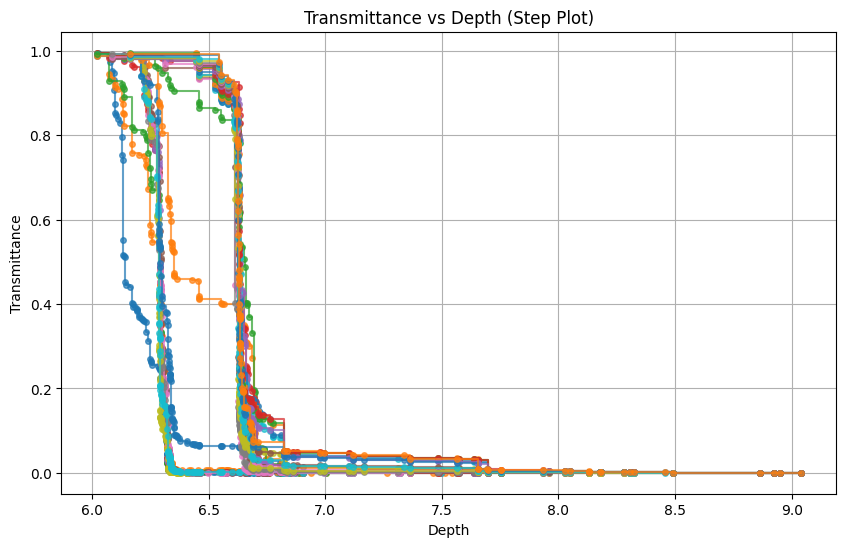

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define file path and chunk size
file_path = '/content/drive/MyDrive/3dgs/gaussian-splatting/alpha_vals.csv'
chunksize = 32

# Step 2: Initialize plot
plt.figure(figsize=(10, 6))

# Step 3: Process the CSV in chunks
chunk_number = 0

for chunk in pd.read_csv(file_path, chunksize=chunksize):
    chunk_number += 1

    if chunk_number < 22:
      continue

    # Step 4: Process each row in the chunk
    for index, row in chunk.iterrows():
        transmittances = []
        depths = []
        T = 1.0  # Start transmittance at 1 (fully transparent)

        for i in range(150):  # Assuming there are 150 Gaussian values per row
            alpha_val = row.get(f'Gaussian_{i}_alpha', 0.0)
            depth_val = row.get(f'Gaussian_{i}_depth', 0.0)

            # Stop processing when 0.0 is encountered
            if alpha_val == 0.0 or depth_val == 0.0:
                break

            T *= (1 - alpha_val)  # Update transmittance
            transmittances.append(T)  # Store current transmittance
            depths.append(depth_val)  # Store corresponding depth

        if len(transmittances) == len(depths) and len(transmittances) > 0:
            # Plot the transmittance vs depth as a step plot (level graph)
            plt.step(depths, transmittances, where='post', label=f'Pixel {index}', alpha=0.7, marker="o", markersize=4)

    break

# Step 5: Label the plot
plt.xlabel('Depth')
plt.ylabel('Transmittance')
plt.title('Transmittance vs Depth (Step Plot)')
plt.grid(True)

# Step 6: Show the plot
plt.show()


Processing chunk 1...
Processing chunk 2...
Processing chunk 3...
Processing chunk 4...
Processing chunk 5...
Processing chunk 6...
Processing chunk 7...
Processing chunk 8...


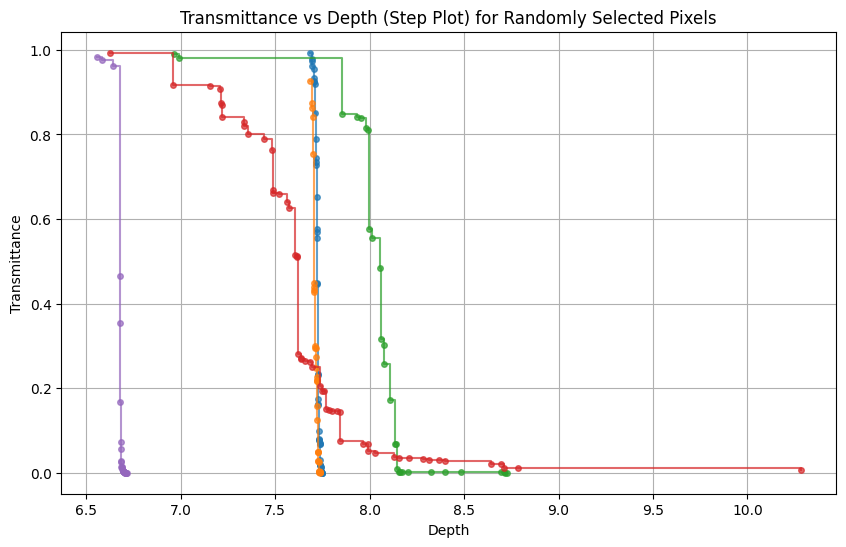

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Step 1: Define file path and chunk size
file_path = '/content/drive/MyDrive/3dgs/gaussian-splatting/alpha_vals.csv'
chunksize = 100  # Adjust this size based on available memory
total_rows = 1000  # Adjust this based on your dataset (or calculate dynamically if needed)
random_pixels = sorted(random.sample(range(total_rows), 5))  # Pick 5 random rows (pixels)

# Step 2: Initialize plot
plt.figure(figsize=(10, 6))

# Step 3: Process the CSV in chunks
chunk_number = 0
row_counter = 0  # Global row counter to track which row we're on

for chunk in pd.read_csv(file_path, chunksize=chunksize):
    chunk_number += 1
    print(f"Processing chunk {chunk_number}...")

    # Step 4: Process only random selected rows in the chunk
    for index, row in chunk.iterrows():
        # Check if the current global row index is in the randomly selected pixels
        if row_counter in random_pixels:
            transmittances = []
            depths = []
            T = 1.0  # Start transmittance at 1 (fully transparent)

            for i in range(150):  # Assuming there are 150 Gaussian values per row
                alpha_val = row.get(f'Gaussian_{i}_alpha', 0.0)
                depth_val = row.get(f'Gaussian_{i}_depth', 0.0)

                # Stop processing when 0.0 is encountered
                if alpha_val == 0.0 or depth_val == 0.0:
                    break

                T *= (1 - alpha_val)  # Update transmittance
                transmittances.append(T)  # Store current transmittance
                depths.append(depth_val)  # Store corresponding depth

            # Only plot if we have valid transmittance and depth pairs
            if len(transmittances) == len(depths) and len(transmittances) > 0:
                # Plot the transmittance vs depth as a step plot (level graph)
                plt.step(depths, transmittances, where='post', label=f'Pixel {index}', alpha=0.7, marker="o", markersize=4)

        row_counter += 1  # Update the global row counter

    if row_counter >= max(random_pixels):  # Stop when we have processed the highest random pixel
        break

# Step 5: Label the plot
plt.xlabel('Depth')
plt.ylabel('Transmittance')
plt.title('Transmittance vs Depth (Step Plot) for Randomly Selected Pixels')
plt.grid(True)

# Step 6: Show the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import percentileofscore
from tqdm import tqdm  # Progress bar

file_path = '/content/drive/MyDrive/3dgs/gaussian-splatting/splat_tile.csv'

depth_diff = []
counts = []

with open(file_path, "r") as file:
    for line in tqdm(file, desc="Processing lines"):
        line = line.strip()
        values = [val for val in line.split(",") if val]

        count = 0
        prev = 0.0
        for depth_val in map(float, values):
            if (depth_val - prev) > 0.1174:
                depth_diff.append(depth_val - prev)
                count += 1
                prev = depth_val
        counts.append(count)  # Add count for this line to counts list

# Calculate statistics
print('Max number of clusters:', np.max(counts))
print('Min number of clusters:', np.min(counts))
print('1st percentile:', np.percentile(counts, 1))
print('90th percentile:', np.percentile(counts, 99))
print('Variance of number of clusters:', np.var(counts))
print('Average number of clusters:', np.mean(counts))

print("\n")

# Depth statistics
print('Max depth diff:', np.max(depth_diff))
print('Min depth diff:', np.min(depth_diff))
print('1st percentile:', np.percentile(depth_diff, 1))
print('5th percentile:', np.percentile(depth_diff, 5))
print('99th percentile:', np.percentile(depth_diff, 99))
print('Average depth diff:', np.mean(depth_diff))
print('Variance of depth diff:', np.var(depth_diff))


Processing lines: 4108it [00:01, 2919.05it/s]


Max number of clusters: 45
Min number of clusters: 17
1st percentile: 18.0
90th percentile: 43.0
Variance of number of clusters: 36.40823424784945
Average number of clusters: 31.046738072054527


Max depth diff: 2.9618900000000004
Min depth diff: 0.11740000000000039
1st percentile: 0.11743999999999932
5th percentile: 0.11760999999999999
99th percentile: 1.88721
Average depth diff: 0.295076855417908
Variance of depth diff: 0.14348142221509044


In [ ]:
# count clusters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.stats import percentileofscore

# Read the CSV file
file_path = '/content/drive/MyDrive/3dgs/output/alpha_vals.csv'

data = pd.read_csv(file_path)

def count_clusters_by_depth (data):
    '''find the number of clusters at same depth for each row in the data'''
    counts = []
    depths = []
    for _, row in data.iterrows():
        count = 1
        depth = 0.0
        row_depths = []
        for i in range(150):
            alpha_val = row.get(f'Gaussian_{i}_alpha', 0.0)
            depth_val = row.get(f'Gaussian_{i}_depth', 0.0)

            if depth_val - depth > 5e-6:
                count += 1
                depth = depth_val

            if alpha_val == 0.0 or depth_val == 0.0:
                break
            row_depths.append(depth_val)  # Store corresponding depth
        counts.append(count)
        depths.append(np.var(row_depths))
    return counts, depths

counts, depths = count_clusters_by_depth(data)

# min, max, 1st and 99th percentile, variance and average of clusters
print('Max number of clusters at same depth:', np.max(counts))
print('Min number of clusters at same depth:', np.min(counts))
print('1st percentile:', np.percentile(counts, 1))
print('99th percentile:', np.percentile(counts, 99))
print('Variance of number of clusters at same depth:', np.var(counts))
print('Average number of clusters at same depth:', np.mean(counts))

# given 8 clusters, find corresponding percentile
value = 8
percentile_value = percentileofscore(counts, value)
print(f'The value {value} is at the {percentile_value}th percentile in the list.')


# min, max, and average of depth
print('Max depth:', np.max(depths))
print('Min depth:', np.min(depths))
print('Average depth:', np.mean(depths))



KeyboardInterrupt: 

The code below show the percentage of pixel that use less than 150 splats for the rendering part

In [ ]:
import pandas as pd

# Define chunk size (adjust as needed)
chunksize = 10000

# Initialize a counter for -1.0 values and total rows
total_neg_ones = 0
total_rows = 0

# Iterate through chunks of the CSV file
for chunk in pd.read_csv('/content/drive/MyDrive/3dgs/gaussian-splatting/alpha_vals.csv', chunksize=chunksize):
    # Count -1.0 values in the current chunk
    neg_ones_in_chunk = (chunk['Gaussian_149_depth'] == -1.0).sum()

    # Update totals
    total_neg_ones += neg_ones_in_chunk
    total_rows += len(chunk)

# Calculate and print the percentage
percentage = total_neg_ones / total_rows
print(percentage)

0.9998251676333868


This code give the percentile of alpha values for all splats

Total valid alpha values: 58943621
1st percentile: 0.00406362
98th percentile: 0.652042
Mean: 0.0854766615706086


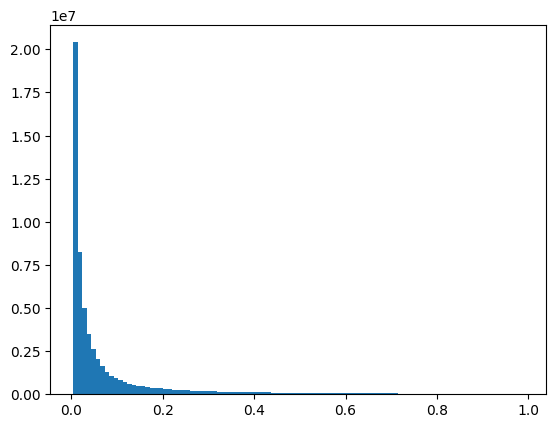

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from concurrent.futures import ProcessPoolExecutor

# Define chunk size
chunksize = 10000

# Function to process a single chunk and extract valid alpha values
def process_chunk(chunk):
    # Collect all the alpha column names
    alpha_columns = [col for col in chunk.columns if 'alpha' in col]

    # Extract valid alpha values using vectorized operations
    valid_alphas_chunk = chunk[alpha_columns].values
    valid_alphas_chunk = valid_alphas_chunk[valid_alphas_chunk != -1]

    # Return the valid alpha values
    return valid_alphas_chunk

# Initialize a list to store valid alpha values
alpha_vals = []

# Read the CSV file in chunks and process each chunk in parallel
with ProcessPoolExecutor() as executor:
    # Submit each chunk to the process pool for parallel processing
    futures = []
    for chunk in pd.read_csv('/content/drive/MyDrive/3dgs/gaussian-splatting/alpha_vals.csv', chunksize=chunksize):
        futures.append(executor.submit(process_chunk, chunk))

    # Collect results from each processed chunk
    for future in futures:
        alpha_vals.extend(future.result())

# Calculate percentiles and mean using NumPy
alpha_vals = np.array(alpha_vals)
percentile_1 = np.percentile(alpha_vals, 1)
percentile_98 = np.percentile(alpha_vals, 98)
mean_val = np.mean(alpha_vals)

# Print the results
print(f"Total valid alpha values: {len(alpha_vals)}")
print(f"1st percentile: {percentile_1}")
print(f"98th percentile: {percentile_98}")
print(f"Mean: {mean_val}")

# Plot the histogram of alpha values
plt.hist(alpha_vals, bins=100)
plt.show()


Check the depth of each tile

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import argparse
import numpy as np
from PIL import Image, ImageDraw
from itertools import chain
import csv

def collect_min_dist(data, epsilon):
    dist_pix = dict()
    counts = []
    for idx, (_, row) in enumerate(data.iterrows()):
        pixel_dist = []
        depth = 0.0
        row = row.dropna().tolist()
        count = 0

        row = [float(x) for x in row if x]

        for i in range(1, len(row), 2):
            if row[i] - depth > epsilon:
                pixel_dist.append(row[i] - depth)
                depth = row[i]
                count += 1

        # Skip if only one cluster exists
        counts.append(count)
        if count == 0:
            continue

    return counts, dist_pix

file_path = '/content/drive/MyDrive/3dgs/gaussian-splatting/splat_tile.csv'
with open(file_path, 'r') as file:
    reader = csv.reader(file)
    data = list(reader)

data = pd.DataFrame(data)
counts, dist_pix = collect_min_dist(data, 5e-6)



### Evaluate the quality of clustering algorithm

The following code proves that data collected from the cuda kernel is free of error.

In [ ]:
from PIL import Image
import random
import pandas as pd

# Function to compute the color using the alpha and RGB values from Gaussian splats
def compute_color(row):
    # Initialize final color (R, G, B) and alpha
    final_color_r = 0.0
    final_color_g = 0.0
    final_color_b = 0.0
    final_t = 1.0

    # Iterate through each Gaussian (0 to 149)
    for i in range(150):
        alpha = row[f'Gaussian_{i}_alpha']
        if alpha == 0:
            break  # Stop if we encounter alpha = 0

        # Get the current Gaussian's RGB values
        color_r = row[f'Gaussian_{i}_color_r']
        color_g = row[f'Gaussian_{i}_color_g']
        color_b = row[f'Gaussian_{i}_color_b']

        # Compute the blended color using the alpha compositing formula
        final_color_r += final_t * alpha * color_r
        final_color_g += final_t * alpha * color_g
        final_color_b += final_t * alpha * color_b

        final_t = final_t * (1 - alpha)
    # Return the final computed RGB color as a tuple
    return (final_color_r, final_color_g, final_color_b)

def get_row_from_csv(file_path, row_index, chunksize=10000):
    # Read the file in chunks of size `chunksize`
    for chunk in pd.read_csv(file_path, chunksize=chunksize):
        if row_index >= chunk.index[0] and row_index <= chunk.index[-1]:
            # If the row index is in this chunk, return the row
            return chunk.iloc[row_index - chunk.index[0]]
    return None  # If the row is not found (just in case)

# Open the image file
image = Image.open('/content/drive/MyDrive/3dgs/data/pre-trained/3DGS/drjohnson/train/ours_30000/renders/00020.png')

# Get the width and height of the image
width, height = image.size
print (f"total pixel {width * height}")

# Pick random x and y coordinates between 0 and the width and height of the image
x = random.randint(0, width - 1)
y = random.randint(0, height - 1)

# Get the RGB value of the pixel at (x, y)
rgb_value = image.getpixel((x, y))

# Print the RGB value of the randomly selected pixel
print(f"RGB value at ({x}, {y}): {rgb_value}")

# Compute pixelNum based on the x and y coordinates (row-major order)
pixNum = x + y * width
print(f"Pixel number in CSV: {pixNum}")

# Read the CSV file and retrieve the corresponding row for the pixel
pix_row = get_row_from_csv('/content/drive/MyDrive/3dgs/gaussian-splatting/alpha_vals.csv', pixNum)

# Compute the final color using the Gaussian splats in the CSV
final_color = compute_color(pix_row)

# Print the computed color from the Gaussian splats
print(f"Computed color from Gaussian splats for pixel {pixNum}: {final_color}")
print(pix_row)
# print(f"Ground truth at ({x}, {y}): {pix_row[""]}")


total pixel 1166832
RGB value at (868, 267): (93, 62, 42)
Pixel number in CSV: 356512
Size of csv: (1166832, 757)
Computed color from Gaussian splats for pixel 356512: (0.3645718491198101, 0.24213061416743156, 0.16581358205736954)
pixelNum                pixel 356512
out_color_r                 0.364604
out_color_g                  0.24214
out_color_b                 0.165837
bg_color_r                         0
                            ...     
Gaussian_149_alpha                 0
Gaussian_149_depth                 0
Gaussian_149_color_r               0
Gaussian_149_color_g               0
Gaussian_149_color_b               0
Name: 356512, Length: 757, dtype: object


Randomly sample data from original csv, reducing cost of fetching data

In [30]:
import pandas as pd

# File paths
input_file_path = '/content/drive/MyDrive/3dgs/gaussian-splatting/alpha_vals.csv'
output_file_path = '/content/drive/MyDrive/3dgs/gaussian-splatting/update_playroom_20.csv'

n_rows = 10000

# Read part of the CSV
df = pd.read_csv(input_file_path, nrows=n_rows)
df.to_csv(output_file_path, index=False)


### Streaming Sort: Single Pixel

Import library for processing data and set up file path for gt

In [47]:
import numpy as np
import polars as pl
from PIL import Image
import random
import pandas as pd
import matplotlib.pyplot as plt
import math

gt_image_path = '/content/drive/MyDrive/3dgs/data/pre-trained/3DGS/playroom/train/ours_30000/gt/00020.png'
render_image_path = '/content/drive/MyDrive/3dgs/data/pre-trained/3DGS/playroom/train/ours_30000/renders/00020.png'

Load the dataset and pick random pixel

In [ ]:
data = pl.scan_csv('/content/drive/MyDrive/3dgs/gaussian-splatting/update_playroom_20.csv')
pixel_row = 0
pixel_num = data.select(pl.all()).slice(pixel_row, 1).collect().to_numpy()

Get the rendered image and ground truth

In [51]:
image = Image.open(render_image_path)
gt_image = Image.open(gt_image_path)

def rgb_diff(gt_rgb_value, rgb_value):
    # Return the squared difference between ground truth and input RGB values
    return math.sqrt(sum((v1 - v2) ** 2 for v1, v2 in zip(gt_rgb_value, rgb_value)))

# Get the width and height of the image and random pick x,y
width, height = image.size
x = pixel_num % width
y = pixel_num // width

# Get the RGB value of the pixel at (x, y)
rgb_value = image.getpixel((x, y))
gt_rgb_value = gt_image.getpixel((x, y))
print(f"full sorting RGB value at ({x}, {y}): {rgb_value}")
print(f"Ground truth RGB value at ({x}, {y}): {gt_rgb_value}")
print("Sorting: the difference from ground truth RGB values is:", rgb_diff(gt_rgb_value, rgb_value))

full sorting RGB value at ([[0]], [[0]]): (212, 151, 94)
Ground truth RGB value at ([[0]], [[0]]): (182, 129, 49)
Sorting: the difference from ground truth RGB values is: 58.38664230798


In [55]:
splats_raw = data.select(
    pl.all().exclude("pixelNum", "out_color_r", "out_color_g", "out_color_b", "bg_color_r", "bg_color_g", "bg_color_b"))
splats_raw = splats_raw.select(pl.all()).slice(pixel_row, 1).collect().to_numpy()
splats_reshaped = splats_raw.reshape((splats_raw.shape[1] // 5, 5))

# get rid of all-0 entry
filtered_splats = splats_reshaped[~np.all(splats_reshaped == 0, axis=1)]
print(len(filtered_splats))

transmittances = 1.0
final_r = final_g = final_b = 0.0
filtered_splats = filtered_splats[filtered_splats[:, 1].argsort()]

for i in range(len(filtered_splats)):
    alpha, depth, color_r, color_g, color_b = filtered_splats[i]
    final_r += transmittances * alpha * color_r
    final_g += transmittances * alpha * color_g
    final_b += transmittances * alpha * color_b
    transmittances *= (1 - alpha)
    if transmittances < 0.0001:
        break

print(f"sorted final_r is {final_r * 255}")
print(f"sorted final_g is {final_g * 255}")
print(f"sorted final_b is {final_b * 255}")

#shuffle the splats
np.random.seed(None)  # Use a random seed each time
np.random.shuffle(filtered_splats)
print(filtered_splats[0:30])
transmittances = 1.0
final_r = final_g = final_b = 0.0
for i in range(len(filtered_splats)):
    alpha, depth, color_r, color_g, color_b = filtered_splats[i]
    final_r += transmittances * alpha * color_r
    final_g += transmittances * alpha * color_g
    final_b += transmittances * alpha * color_b
    transmittances *= (1 - alpha)
    if transmittances <= 1/255:
        break
print(f"unsorted final_r is {final_r * 255}")
print(f"unsorted final_g is {final_g * 255}")
print(f"unsorted final_b is {final_b * 255}")
rgb_value = (final_r * 255, final_g * 255, final_b * 255)
print("UnSorting: the difference from ground truth RGB values is:", rgb_diff(gt_rgb_value, rgb_value))

93
sorted final_r is 211.51492422152083
sorted final_g is 151.33122794693753
sorted final_b is 93.5315648415337
[[4.68819e-03 7.84733e+00 1.01642e+00 7.35975e-01 5.08641e-01]
 [2.27824e-02 7.71928e+00 7.59282e-01 5.17861e-01 4.14212e-01]
 [4.42698e-01 7.76198e+00 3.99649e-01 3.09441e-01 2.09823e-01]
 [9.66558e-02 7.71309e+00 8.88597e-01 6.60628e-01 4.22812e-01]
 [1.38701e-01 7.78620e+00 5.90777e-01 3.27781e-01 8.31387e-02]
 [5.97675e-03 7.72621e+00 8.45294e-01 6.03707e-01 3.80519e-01]
 [4.13340e-03 7.73150e+00 8.54910e-01 6.34808e-01 3.37892e-01]
 [1.03909e-02 7.72782e+00 8.31970e-01 5.99186e-01 3.81708e-01]
 [1.90142e-02 7.72816e+00 8.70987e-01 6.27322e-01 4.11852e-01]
 [4.76022e-03 7.74748e+00 8.67573e-01 6.11781e-01 3.57925e-01]
 [1.11372e-01 8.05804e+00 4.97350e-01 2.48754e-01 4.27811e-01]
 [4.27320e-03 7.72153e+00 7.26485e-01 4.82623e-01 3.31028e-01]
 [9.69366e-03 7.79760e+00 7.48274e-01 4.99234e-01 2.23873e-01]
 [1.82559e-02 7.71712e+00 7.33215e-01 5.22134e-01 2.81999e-01]
 [2.30

### Implementation of naive clustering algorithm

In [40]:
def cluster(splats):
  # cluster the splats close together
  m = dict()
  for i in range(len(splats)):
      alpha, depth, color_r, color_g, color_b = splats[i]
      rgb_value = (color_r, color_g, color_b)

      if len(m.keys()) == 0:
        m[depth] = [(alpha, rgb_value)]
      else:
        closest_key = min(m.keys(), key=lambda k: abs(k - depth))
        if abs(depth - closest_key) < 0.11:
          m[closest_key].append((alpha, rgb_value))
        else:
          m[depth] = [(alpha, rgb_value)]

  # sort the map by key
  m = dict(sorted(m.items()))

  alpha_color = []
  for key in m.keys():
      final_alpha = 1.0
      final_color = (0.0, 0.0, 0.0)

      # Iterate through each item in m
      for alpha, color in m[key]:
          final_color = (
              final_color[0] + final_alpha * alpha * color[0],
              final_color[1] + final_alpha * alpha * color[1],
              final_color[2] + final_alpha * alpha * color[2],
          )
          final_alpha *= (1 - alpha)

      final_alpha = 1 - final_alpha
      final_alpha = min(max(final_alpha, 0.0), 1.0)

      if final_alpha > 0:
          final_color = (
              final_color[0] / final_alpha,
              final_color[1] / final_alpha,
              final_color[2] / final_alpha,
          )
      else:
          final_color = (0.0, 0.0, 0.0)

      final_color = (
          min(max(final_color[0], 0.0), 1.0),
          min(max(final_color[1], 0.0), 1.0),
          min(max(final_color[2], 0.0), 1.0),
      )

      alpha_color.append((final_alpha, final_color))

  final_r = 0.0;
  final_g = 0.0;
  final_b = 0.0;
  final_t = 1.0;

  # iterate each item in m
  for alpha, color in alpha_color:
    # get the alpha and color
    final_r += final_t * alpha * color[0]
    final_g += final_t * alpha * color[1]
    final_b += final_t * alpha * color[2]
    final_t = final_t * (1 - alpha)

    if final_t <= 0:
      break

  # print(f"final_r is {final_r}")
  # print(f"final_g is {final_g}")
  # print(f"final_b is {final_b}")
  return (final_r * 255, final_g * 255, final_b * 255)

### Streaming Sorting Algorithm

In [86]:
def stream_sort(splats):
  # create tuples with specific size
  m = dict()
  for i in range(len(splats)):
      alpha, depth, color_r, color_g, color_b = splats[i]
      rgb_value = (color_r, color_g, color_b)

      if len(m.keys()) == 0:
        m[depth] = [(alpha, rgb_value)]
      else:
        closest_key = min(m.keys(), key=lambda k: abs(k - depth))
        if abs(depth - closest_key) < 0.11:
          m[closest_key].append((alpha, rgb_value))
        else:
          if (len(m.keys()) == 5):
            m[closest_key].append((alpha, rgb_value))
          else:
            m[depth] = [(alpha, rgb_value)]

  # sort the map by key
  m = dict(sorted(m.items()))

  # print len of m
  print(f'number of buckets {len(m.keys())}')

  # print first item in map
  print(f'first item in map {m[list(m.keys())[0]]}')


  # print(len(m.keys()))
  alpha_color = []
  for key in m.keys():
      final_alpha = 1.0
      final_color = (0.0, 0.0, 0.0)

      # Iterate through each item in m
      for alpha, color in m[key]:
          final_color = (
              final_color[0] + final_alpha * alpha * color[0],
              final_color[1] + final_alpha * alpha * color[1],
              final_color[2] + final_alpha * alpha * color[2],
          )
          final_alpha *= (1 - alpha)

      final_alpha = 1 - final_alpha
      final_alpha = min(max(final_alpha, 0.0), 1.0)

      if final_alpha > 0:
          final_color = (
              final_color[0] / final_alpha,
              final_color[1] / final_alpha,
              final_color[2] / final_alpha,
          )
      else:
          final_color = (0.0, 0.0, 0.0)

      final_color = (
          min(max(final_color[0], 0.0), 1.0),
          min(max(final_color[1], 0.0), 1.0),
          min(max(final_color[2], 0.0), 1.0),
      )

      alpha_color.append((final_alpha, final_color))

  final_r = 0.0;
  final_g = 0.0;
  final_b = 0.0;
  final_t = 1.0;

  # iterate each item in m
  for alpha, color in alpha_color:
    # get the alpha and color
    final_r += final_t * alpha * color[0]
    final_g += final_t * alpha * color[1]
    final_b += final_t * alpha * color[2]
    final_t = final_t * (1 - alpha)

    if final_t <= 0:
      break

  print(f"final_r is {final_r}")
  print(f"final_g is {final_g}")
  print(f"final_b is {final_b}")
  return (final_r * 255, final_g * 255, final_b * 255)

### Stream Sorting (w/ Policy)

The merging criterial should based on some policy: we either \\
(1) **merge** the incoming the splats to existing cluster \\
(2) **evict** the previous existing clusters \\
(3) **merget** the existing clusters into one and then add the new cluster \\

In [ ]:
def merging_policy(m:dict, splat):
  # determine how to add the new splat



def stream_sort_policy(splats):
  # create a fixed space tuples or map
  m = dict()

  # for the first inserted element, we insert

  # for the elements that is close to the existing keys (determined by epsilon), we append the key

  # for the elements far away from other splats, if there is space, we add new key to map
  # otherwise we make it into the closest cluster

  # the process should stop when transmittence reach below 1/255

  for i in range(len(splats)):
      alpha, depth, color_r, color_g, color_b = splats[i]
      rgb_value = (color_r, color_g, color_b)

      if len(m.keys()) == 0:
        m[depth] = (alpha, rgb_value)
      else:
        closest_key = min(m.keys(), key=lambda k: abs(k - depth))
        if abs(depth - closest_key) < 0.11:
          m[closest_key].append((alpha, rgb_value))
        else:
          if (len(m.keys()) == 5):
            merging_policy(m, (alpha, depth, color_r, color_g, color_b))
          else:
            m[depth] = (alpha, rgb_value)

  transmittances = 1.0
  final_r = final_g = final_b = 0.0
  for key in m.keys():
      alpha, color = m[key]
      final_r += transmittances * alpha * color[0]
      final_g += transmittances * alpha * color[1]
      final_b += transmittances * alpha * color[2]
      transmittances *= (1 - alpha)
      if transmittances <= 1/255:
        break

  print(f"final_r is {final_r}")
  print(f"final_g is {final_g}")
  print(f"final_b is {final_b}")

  return (final_r * 255, final_g * 255, final_b * 255)


IndentationError: expected an indented block after function definition on line 1 (<ipython-input-20-2165a438f395>, line 6)

### Demonstrate the final result

number of buckets 5
first item in map [(0.0179065, (0.792074, 0.296776, 0.232495))]
final_r is 0.6227087332536783
final_g is 0.4479498408407574
final_b is 0.28124143929412443
Clustered RGB value at ([[0]], [[0]]): (158.79072697968795, 114.22720941439313, 71.71656702000173)
Clustering: The difference from ground truth values is: 8.078012911910228


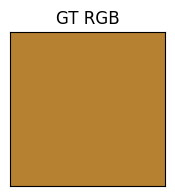

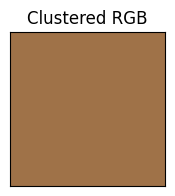

In [87]:
clustered_rgb = stream_sort(filtered_splats)
print(f"Clustered RGB value at ({x}, {y}): {clustered_rgb}")

diff = rgb_diff(gt_rgb_value, clustered_rgb)
print("Clustering: The difference from ground truth values is:", diff)

# Show ground truth
gt_rgb_color = (gt_rgb_value[0] / 255, gt_rgb_value[1] / 255, gt_rgb_value[2] / 255)
fig, ax = plt.subplots(figsize=(2, 2))
ax.set_facecolor(gt_rgb_color)
ax.set_xticks([])
ax.set_yticks([])
plt.title("GT RGB")
plt.show()

# Show clustered result
c_rgb_color = (clustered_rgb[0] / 255, clustered_rgb[1] / 255, clustered_rgb[2] / 255)
fig, ax = plt.subplots(figsize=(2, 2))
ax.set_facecolor(c_rgb_color)
ax.set_xticks([])
ax.set_yticks([])
plt.title("Clustered RGB")
plt.show()

This code read the entire dataset, output the error graph for all pixels

## Merge Alrithm to entire image

Find the pixel where the clustering algorithm is underperfoming

Reading CSV Chunks:   0%|          | 0/53 [00:00<?, ?it/s]

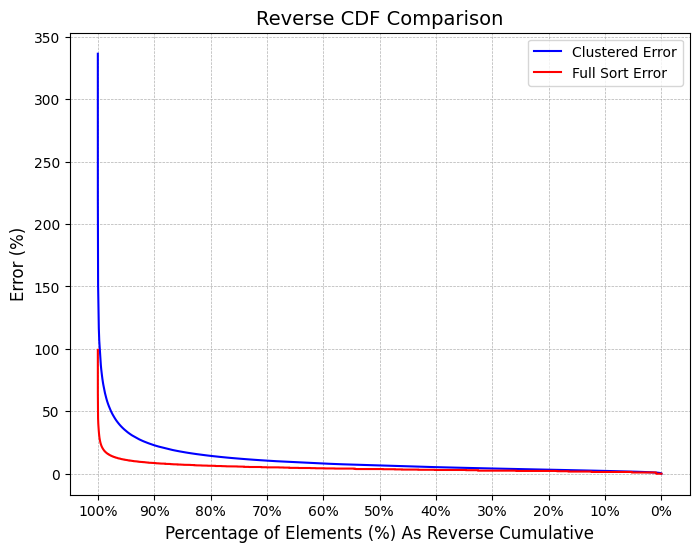

In [ ]:
from tqdm.notebook import tqdm  # Import notebook-specific tqdm
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image
from collections import defaultdict
from joblib import Parallel, delayed  # For parallel processing
import math
from matplotlib.patches import Circle

def reverse_cdf(errors1, errors2, title1, title2):
    # Prepare data
    sorted_data1 = np.sort(errors1)
    cumulative_percent1 = np.linspace(100, 0, len(errors1))
    sorted_data2 = np.sort(errors2)
    cumulative_percent2 = np.linspace(100, 0, len(errors2))

    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(cumulative_percent1, sorted_data1, linestyle='-', color='b', markersize=1, label=title1)
    plt.plot(cumulative_percent2, sorted_data2, linestyle='-', color='r', markersize=1, label=title2)


    # Change X axis
    plt.xticks(
        ticks=np.linspace(0, 100, 11),  # Create 11 evenly spaced ticks (0%, 10%, ..., 100%)
        labels=[f"{int(100 - i)}%" for i in np.linspace(0, 100, 11)]  # Labels from 100% to 0%
    )

    plt.xlabel('Percentage of Elements (%) As Reverse Cumulative', fontsize=12)
    plt.ylabel('Error (%)', fontsize=12)
    plt.title('Reverse CDF Comparison', fontsize=14)
    plt.legend()
    plt.grid(True, which="both", linestyle='--', linewidth=0.5)
    plt.show()

def process_row(row, width, image_pixels, gt_pixels):
    """Process a single row to compute errors."""
    x = row['pixelNum'] % width
    y = row['pixelNum'] // width

    sort_rgb_value = image_pixels[x, y]
    gt_rgb_value = gt_pixels[x, y]

    sort_diff = rgb_diff(gt_rgb_value, sort_rgb_value)

    splats = row.iloc[7:].to_numpy().reshape(-1, 5)
    shuffled_splats = np.random.permutation(splats)
    clustered_rgb = cluster(shuffled_splats)
    cluster_diff = rgb_diff(gt_rgb_value, clustered_rgb)

    underperform_pixel = None
    if cluster_diff - sort_diff > 20:
        underperform_pixel = (x, y)

    return sort_diff, cluster_diff, underperform_pixel

def highlight_underperform_pixels(image_path, underperform_pixels):
    """Function to display the image with circles around underperforming pixels."""
    # Load the image with matplotlib
    img = Image.open(image_path)
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.imshow(img)

    # Draw circles around underperforming pixels
    for (x, y) in underperform_pixels:
        circle = Circle((x, y), radius=5, color='red', fill=False, linewidth=1)
        ax.add_patch(circle)

    # Hide axes for cleaner visualization
    ax.axis('off')
    plt.show()

# Load images and convert them to pixel arrays for fast access
image = Image.open('/content/drive/MyDrive/3dgs/data/pre-trained/3DGS/playroom/train/ours_30000/renders/00020.png')
gt_image = Image.open('/content/drive/MyDrive/3dgs/data/pre-trained/3DGS/playroom/train/ours_30000/gt/00020.png')
width, height = image.size
image_pixels = image.load()
gt_pixels = gt_image.load()

# Initialize error lists
cluster_err = []
full_sort_err = []
underperform_pixels = []

csv_path = '/content/drive/MyDrive/3dgs/gaussian-splatting/alpha_vals.csv'
chunksize = 20000
total_chunks = math.ceil(width * height / chunksize)

for chunk in tqdm(pd.read_csv(csv_path, chunksize=chunksize), desc="Reading CSV Chunks", total=total_chunks):
    results = Parallel(n_jobs=10, backend='threading')(
        delayed(process_row)(row, width, image_pixels, gt_pixels)
        for _, row in chunk.iterrows()
    )

    # Collect results
    for sort_diff, cluster_diff, pixel in results:
        full_sort_err.append(sort_diff)
        cluster_err.append(cluster_diff)
        if pixel is not None:
            underperform_pixels.append(pixel)

# Plot errors using reverse CDF
reverse_cdf(cluster_err, full_sort_err, "Clustered Error", "Full Sort Error")

# Circle the underperform pixels in rendered image
# highlight_underperform_pixels(
#     '/content/drive/MyDrive/3dgs/data/pre-trained/3DGS/playroom/train/ours_30000/renders/00020.png',
#     underperform_pixels
# )

In [ ]:
from tqdm.notebook import tqdm  # Import notebook-specific tqdm
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image
from collections import defaultdict
from joblib import Parallel, delayed  # For parallel processing
import math

def color_accum(splats):
    T = 1.0;
    r = g = b = 0.0;
    for i in range(len(splats)):
        alpha, depth, color_r, color_g, color_b = splats[i]
        r += T * alpha * color_r
        g += T * alpha * color_g
        b += T * alpha * color_b
        T *= (1 - alpha)
        if T <= 0.001:
          break
    return (r * 255, g * 255, b * 255)


def process_row(row, width):
    """Process a row to compute the clustered RGB value."""
    x = int(row['pixelNum'] % width)
    y = int(row['pixelNum'] // width)

    # Drop the first seven columns from the row
    row = row.iloc[7:]
    splats = row.to_numpy().reshape(-1, 5)
    rendered_rgb = color_accum(splats)
    return x, y, rendered_rgb

# Load CSV data in chunks and initialize the pixel array
image = Image.open('/content/drive/MyDrive/3dgs/data/pre-trained/3DGS/playroom/train/ours_30000/renders/00020.png')
width, height = image.size  # Replace with your image dimensions
reconstructed_image = np.zeros((height, width, 3), dtype=np.uint8)

csv_path = '/content/drive/MyDrive/3dgs/gaussian-splatting/alpha_vals.csv'
chunksize = 20000
total_chunks = math.ceil(width * height / chunksize)

# Process the CSV and fill the pixel array
for chunk in tqdm(pd.read_csv(csv_path, chunksize=chunksize), desc="Reading CSV Chunks", total=total_chunks):
    results = Parallel(n_jobs=10, backend='threading')(
        delayed(process_row)(row, width) for _, row in chunk.iterrows()
    )

    # Populate the pixel array with clustered RGB values
    for x, y, clustered_rgb in results:
        if 0 <= x < width and 0 <= y < height:  # Ensure the indices are within bounds
            reconstructed_image[y, x] = np.array(clustered_rgb, dtype=np.uint8)

# Convert the pixel array to an image
final_image = Image.fromarray(reconstructed_image)

# Display the reconstructed image using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(final_image)
plt.axis('off')  # Hide axes for better visualization
plt.show()

# Optionally, save the image
final_image.save("/content/reconstructed_image.png")
print("Reconstructed image saved!")


In [ ]:
# Load CSV data using Polars
csv_path = '/content/drive/MyDrive/3dgs/gaussian-splatting/alpha_vals.csv'
df_temp = pl.read_csv(csv_path, n_rows=1)
column_names = df_temp.columns

schema_overrides = {name: pl.Float32 for name in column_names if name != 'pixelNum'}
schema_overrides['pixelNum'] = pl.Int64  # Set 'pixelNum' as Int64

# Load the CSV with the specified schema overrides
df = pl.read_csv(csv_path, schema_overrides=schema_overrides)

In [ ]:
# Assuming `df` is your Polars DataFrame
# Slice to get the row at index 685241
row_df = df.slice(685241, 1)

# Convert the row to a NumPy array
row_values = row_df.to_numpy()[0]  # `to_numpy()` returns a 2D array; use [0] to get the first (and only) row

# Skip the first 7 elements and reshape the rest to (-1, 5)
splats = row_values[7:].reshape(-1, 5)
print (splats[:6])

T = 1.0;
r = g = b = 0.0;
for i in range(len(splats)):
    alpha, depth, color_r, color_g, color_b = splats[i]
    r += T * alpha * color_r
    g += T * alpha * color_g
    b += T * alpha * color_b
    T *= (1 - alpha)
    if T <= 0.001:
      break

print(f"final_r is {r * 255}")
print(f"final_g is {g * 255}")
print(f"final_b is {b * 255}")

[[4.31022001e-03 4.20908022e+00 6.05642974e-01 3.77306014e-01
  1.11005999e-01]
 [4.07054015e-02 4.38262987e+00 7.79238999e-01 3.06398004e-01
  0.00000000e+00]
 [5.41994013e-02 4.39888000e+00 9.21015978e-01 4.16873008e-01
  0.00000000e+00]
 [4.47255978e-03 4.40597010e+00 9.13034976e-01 3.91086996e-01
  0.00000000e+00]
 [6.88163005e-03 4.42254019e+00 9.27959025e-01 4.05380011e-01
  0.00000000e+00]
 [2.05914006e-02 4.42500019e+00 9.75407004e-01 4.66013014e-01
  0.00000000e+00]]
final_r is 228.6515354636553
final_g is 101.49446029688373
final_b is 0.7687917084489848


In [ ]:
row = df.slice(685241,1)

# do color accumulation
print(row)

# print row into csv file
row.write_csv('/content/row.csv')

shape: (1, 2_507)
┌──────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ pixelNum ┆ out_color ┆ out_color ┆ out_color ┆ … ┆ Gaussian_ ┆ Gaussian_ ┆ Gaussian_ ┆ Gaussian_ │
│ ---      ┆ _r        ┆ _g        ┆ _b        ┆   ┆ 499_depth ┆ 499_color ┆ 499_color ┆ 499_color │
│ i64      ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ _r        ┆ _g        ┆ _b        │
│          ┆ f32       ┆ f32       ┆ f32       ┆   ┆ f32       ┆ ---       ┆ ---       ┆ ---       │
│          ┆           ┆           ┆           ┆   ┆           ┆ f32       ┆ f32       ┆ f32       │
╞══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 685241   ┆ 0.896673  ┆ 0.398017  ┆ 0.003015  ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       │
└──────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘


In [ ]:
import polars as pl
import numpy as np
from PIL import Image

# Ensure the DataFrame contains the necessary columns
required_columns = ['pixelNum', 'out_color_r', 'out_color_g', 'out_color_b']
if not all(col in df.columns for col in required_columns):
    raise ValueError(f"CSV file must contain the columns: {required_columns}")

# Extract RGB color values as NumPy arrays
r_values = df['out_color_r'].to_numpy()
g_values = df['out_color_g'].to_numpy()
b_values = df['out_color_b'].to_numpy()

# Load the reference image to get dimensions
image = Image.open('/content/drive/MyDrive/3dgs/data/pre-trained/3DGS/playroom/train/ours_30000/renders/00020.png')
width, height = image.size

# Create an empty image array (height, width, 3) for RGB
image_array = np.zeros((height, width, 3), dtype=np.uint8)

# Populate the image array using row-major order from 'pixelNum'
pixel_nums = df['pixelNum'].to_numpy()
for i in range(len(df)):
    pixel_num = int(pixel_nums[i])
    x = pixel_num % width
    y = pixel_num // width
    if (x == 153 and y == 542):
      print(pixel_num)
    if 0 <= x < width and 0 <= y < height:
        image_array[y, x] = [r_values[i] * 255, g_values[i] * 255, b_values[i] * 255]

# Convert the NumPy array to an image
final_image = Image.fromarray(image_array)

# Display or save the image
final_image.show()  # Display the image
final_image.save('/content/reconstructed_image_out.png')  # Save the image
print("Image reconstructed and saved!")

685241
Image reconstructed and saved!


Reading CSV Chunks:   0%|          | 0/1052 [00:00<?, ?it/s]

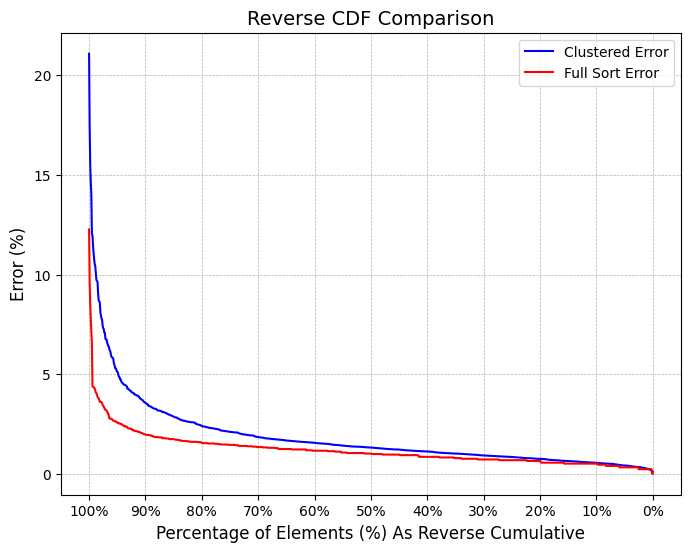

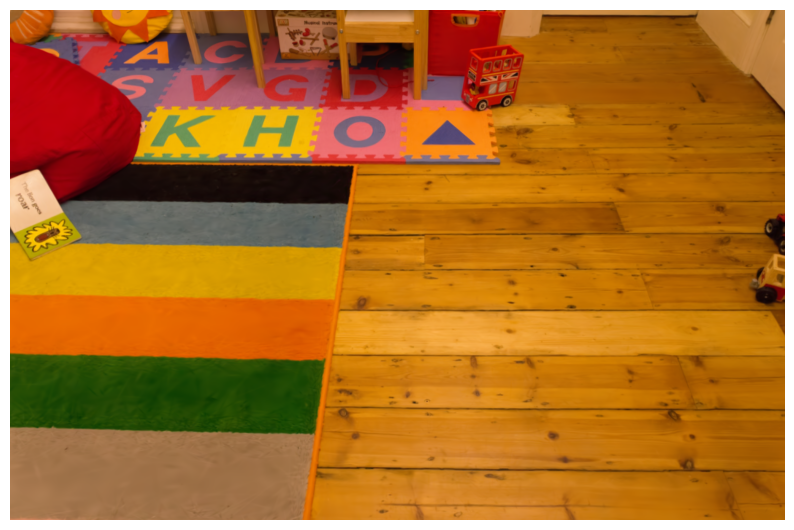

In [83]:
from tqdm.notebook import tqdm  # Import notebook-specific tqdm
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image
from collections import defaultdict
from joblib import Parallel, delayed  # For parallel processing
import math
from matplotlib.patches import Circle

def create_tuple_for_splat(row):
    # Use list comprehension for faster tuple creation
    return [
        (row[f'Gaussian_{i}_alpha'], row[f'Gaussian_{i}_depth'],
         row[f'Gaussian_{i}_color_r'], row[f'Gaussian_{i}_color_g'], row[f'Gaussian_{i}_color_b'])
        for i in range(500) if row[f'Gaussian_{i}_alpha'] > 0
    ]

def rgb_diff(gt_rgb_value, rgb_value):
    rgb1, rgb2 = np.array(gt_rgb_value), np.array(rgb_value)
    dist = np.linalg.norm(rgb1 - rgb2)  # Euclidean distance
    max_distance = np.sqrt(3 * (255 ** 2))  # Max possible distance
    return (dist / max_distance) * 100  # Percentage error

def cluster(splats):
    # cluster the splats close together
    m = dict()
    for i in range(len(splats)):
        alpha, depth, color_r, color_g, color_b = splats[i]
        rgb_value = (color_r, color_g, color_b)

        if len(m.keys()) == 0:
          m[depth] = [(alpha, rgb_value)]
        else:
          closest_key = min(m.keys(), key=lambda k: abs(k - depth))
          if abs(depth - closest_key) < 0.11:
            m[closest_key].append((alpha, rgb_value))
          else:
            m[depth] = [(alpha, rgb_value)]

    # sort the map by key
    m = dict(sorted(m.items()))

    alpha_color = []
    for key in m.keys():
        final_alpha = 1.0
        final_color = (0.0, 0.0, 0.0)

        # Iterate through each item in m
        for alpha, color in m[key]:
            final_color = (
                final_color[0] + final_alpha * alpha * color[0],
                final_color[1] + final_alpha * alpha * color[1],
                final_color[2] + final_alpha * alpha * color[2],
            )
            final_alpha *= (1 - alpha)

        final_alpha = 1 - final_alpha
        final_alpha = min(max(final_alpha, 0.0), 1.0)

        if final_alpha > 0:
            final_color = (
                final_color[0] / final_alpha,
                final_color[1] / final_alpha,
                final_color[2] / final_alpha,
            )
        else:
            final_color = (0.0, 0.0, 0.0)

        final_color = (
            min(max(final_color[0], 0.0), 1.0),
            min(max(final_color[1], 0.0), 1.0),
            min(max(final_color[2], 0.0), 1.0),
        )

        alpha_color.append((final_alpha, final_color))

    final_r = 0.0;
    final_g = 0.0;
    final_b = 0.0;
    final_t = 1.0;

    # iterate each item in m
    for alpha, color in alpha_color:
      # get the alpha and color
      final_r += final_t * alpha * color[0]
      final_g += final_t * alpha * color[1]
      final_b += final_t * alpha * color[2]
      final_t = final_t * (1 - alpha)

      if final_t <= 0:
        break

    # print(f"final_r is {final_r}")
    # print(f"final_g is {final_g}")
    # print(f"final_b is {final_b}")
    return (final_r * 255, final_g * 255, final_b * 255)

def reverse_cdf(errors1, errors2, title1, title2):
    # Prepare data
    sorted_data1 = np.sort(errors1)
    cumulative_percent1 = np.linspace(100, 0, len(errors1))
    sorted_data2 = np.sort(errors2)
    cumulative_percent2 = np.linspace(100, 0, len(errors2))

    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(cumulative_percent1, sorted_data1, linestyle='-', color='b', markersize=1, label=title1)
    plt.plot(cumulative_percent2, sorted_data2, linestyle='-', color='r', markersize=1, label=title2)


    # Change X axis
    plt.xticks(
        ticks=np.linspace(0, 100, 11),  # Create 11 evenly spaced ticks (0%, 10%, ..., 100%)
        labels=[f"{int(100 - i)}%" for i in np.linspace(0, 100, 11)]  # Labels from 100% to 0%
    )

    plt.xlabel('Percentage of Elements (%) As Reverse Cumulative', fontsize=12)
    plt.ylabel('Error (%)', fontsize=12)
    plt.title('Reverse CDF Comparison', fontsize=14)
    plt.legend()
    plt.grid(True, which="both", linestyle='--', linewidth=0.5)
    plt.show()

def process_row(row, width, image_pixels, gt_pixels):
    """Process a single row to compute errors."""
    x = row['pixelNum'] % width
    y = row['pixelNum'] // width

    sort_rgb_value = image_pixels[x, y]
    gt_rgb_value = gt_pixels[x, y]

    sort_diff = rgb_diff(gt_rgb_value, sort_rgb_value)
    splats = create_tuple_for_splat(row)
    random.shuffle(splats)
    clustered_rgb = cluster(splats)
    cluster_diff = rgb_diff(gt_rgb_value, clustered_rgb)

    underperform_pixel = None
    if cluster_diff - sort_diff > 20:
        underperform_pixel = (x, y)

    return sort_diff, cluster_diff, underperform_pixel

def highlight_underperform_pixels(image_path, underperform_pixels):
    """Function to display the image with circles around underperforming pixels."""
    # Load the image with matplotlib
    img = Image.open(image_path)
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.imshow(img)

    # Draw circles around underperforming pixels
    for (x, y) in underperform_pixels:
        circle = Circle((x, y), radius=5, color='red', fill=False, linewidth=1)
        ax.add_patch(circle)

    # Hide axes for cleaner visualization
    ax.axis('off')
    plt.show()

# Load images and convert them to pixel arrays for fast access
image = Image.open('/content/drive/MyDrive/3dgs/data/pre-trained/3DGS/playroom/train/ours_30000/renders/00020.png')
gt_image = Image.open('/content/drive/MyDrive/3dgs/data/pre-trained/3DGS/playroom/train/ours_30000/gt/00020.png')
width, height = image.size
image_pixels = image.load()
gt_pixels = gt_image.load()

# Initialize error lists
cluster_err = []
full_sort_err = []
underperform_pixels = []

csv_path = '/content/drive/MyDrive/3dgs/gaussian-splatting/alpha_vals.csv'
chunksize = 1000
total_chunks = math.ceil(width * height / chunksize)
chunk_number = 0

for chunk in tqdm(pd.read_csv(csv_path, chunksize=chunksize), desc="Reading CSV Chunks", total=total_chunks):
    chunk_number += 1
    if chunk_number != 100:
        continue
    results = Parallel(n_jobs=10, backend='threading')(
        delayed(process_row)(row, width, image_pixels, gt_pixels)
        for _, row in chunk.iterrows()
    )

    # Collect results
    for sort_diff, cluster_diff, pixel in results:
        full_sort_err.append(sort_diff)
        cluster_err.append(cluster_diff)
        if pixel is not None:
            underperform_pixels.append(pixel)
    break

# Plot errors using reverse CDF
reverse_cdf(cluster_err, full_sort_err, "Clustered Error", "Full Sort Error")

# Circle the underperform pixels in rendered image
highlight_underperform_pixels(
    '/content/drive/MyDrive/3dgs/data/pre-trained/3DGS/playroom/train/ours_30000/renders/00020.png',
    underperform_pixels
)